<a href="https://colab.research.google.com/github/lovejavaee/nn/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("student_scores2.csv")
df.head()

FileNotFoundError: ignored

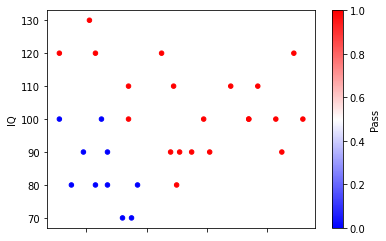

In [ ]:
df.plot.scatter(x="Hours",y= "IQ",c ="Pass",colormap="bwr")

In [ ]:
x = df.drop(["Scores","Pass"],axis=1).values
y = df["Pass"].values.reshape(-1,1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:

scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train = scaler.transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)


In [ ]:

x_test

array([[ 0.26918525, -0.36813756],
       [ 1.92794842,  1.67077814],
       [ 1.01126351,  0.99113958],
       [-1.12766795, -0.36813756],
       [ 1.66603845,  0.31150101],
       [-0.77845465, -0.36813756],
       [-1.04036462,  2.35041671]])

In [ ]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))
def sigmoid_prime(s):
    return s * (1-s)

In [ ]:
class NeuralNetwork(object):
    
    def __init__(self,input_size,output_size):
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_units = 3
        
        self.w1 = np.zeros((self.input_size,self.hidden_units))  
        self.w2 = np.zeros((self.hidden_units,self.output_size))
    
    def forward(self,x_train):
        
        self.output_1 = sigmoid(np.dot(x_train,self.w1))
        self.output_2 = sigmoid(np.dot(self.output_1,self.w2))
        return self.output_2
    
    def backward(self,X,y):
        
        delta_w2 = (self.output_2 - y_train) * sigmoid_prime(self.output_2) 
        delta_w1 = delta_w2.dot(self.w2.T) * sigmoid_prime(self.output_1)
        
        self.w2 = self.w2 + self.output_1.T.dot(delta_w2) * -1
        self.w1 = self.w1 + x_train.T.dot(delta_w1) * -1
    
    def fit(self,x_train,y_train):
        self.forward(x_train)
        self.backward(x_train,y_train)
    
    
    def predict(self,x_test):
        
        return y_prediction
    
    
    def loss(self,x,y_actual):
        prediction = self.forward(x)
        return np.mean(np.square(y_actual - prediction))
 

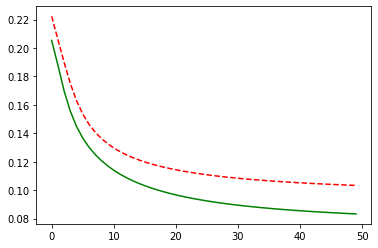

In [ ]:
nn = NeuralNetwork(input_size=2,output_size=1)
train_loss = []
test_loss = []

for i in range(50):
    nn.fit(x_train,y_train)
    train_loss.append(nn.loss(x_train,y_train))
    test_loss.append((nn.loss(x_test,y_test)))

plt.plot(train_loss,'r--')
plt.plot(test_loss,'g')
plt.show()

